In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sqlite3                     
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns            

In [3]:
# Create path

data = '/content/drive/MyDrive/olist.db'


# Create connection with SQLite database
con = sqlite3.connect(data)

# Create cursor
cur = con.cursor()

# Read all tables
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

# Print tables list
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [4]:
# Assign variable names
data_customer = pd.read_sql_query("SELECT * FROM olist_order_customer_dataset", con, index_col = "index")
data_orders = pd.read_sql_query("SELECT * FROM olist_order_dataset", con, index_col = "index")
data_reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", con, index_col = "index")
data_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", con, index_col = "index")
data_order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", con, index_col = "index")
data_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", con, index_col = "index")
data_sellers = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", con, index_col = "index")
data_geolocation = pd.read_sql_query("SELECT * FROM olist_geolocation_dataset", con, index_col = "index")
data_translation = pd.read_sql_query ("SELECT * FROM product_category_name_translation", con, index_col = "index")

# Data Overview

### Customer Table

In [5]:
data_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
index,,,,,
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Orders Table

In [6]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
data_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

### Reviews Table

In [8]:
data_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
index,,,,,,,
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Payments Table

In [9]:
data_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
index,,,,,
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Order Items Table

In [10]:
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Products Table

In [11]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Sellers Table

In [12]:
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
index,,,,
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Geolocation Table

In [13]:
data_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
index,,,,,
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Translation Table

In [14]:
data_translation.head()

,product_category_name,product_category_name_english
index,,
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Data Checking

## Orders Table

### Checking Null

In [15]:
data_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### Checking duplicates

In [16]:
data_orders[data_orders.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
index,,,,,,,,


## Products Table

### Checking Null

In [17]:
data_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### Checking duplicate

In [18]:
data_products[data_products.duplicated(keep=False)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
index,,,,,,,,,


## Order Items Table

### Checking Null

In [19]:
data_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### Checking duplicate

In [20]:
data_order_items[data_order_items.duplicated(keep=False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
index,,,,,,,


## Translation Table

### Checking Null

In [21]:
data_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Checking duplicate

In [22]:
data_translation[data_translation.duplicated(keep=False)]

,product_category_name,product_category_name_english
index,,


## Table Payments

### Checking Null

In [23]:
data_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### Checking duplicate

In [24]:
data_payments[data_payments.duplicated(keep=False)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
index,,,,,


## Merging Data

In [25]:
orders_items = pd.merge(data_order_items, data_orders, on = "order_id", how = "left")
orders_items_products = pd.merge(orders_items, data_products , on = "product_id", how = "left")
orders_items_products_translation = pd.merge(orders_items_products, data_translation, on = "product_category_name", how = "left")
orders_items_products_translation_payments = pd.merge(orders_items_products_translation, data_payments, on = "order_id", how = "inner")

data_final = orders_items_products_translation_payments

### Checking duplicates

In [26]:
data_final[data_final.duplicated(keep=False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value


### Checking null on merged table

In [27]:
data_final.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
product_category_name            1698
product_name_lenght              1698
product_description_lenght       1698
product_photos_qty               1698
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
product_category_name_english    1723
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_valu

### Dropping Unnecessary Columns

In [28]:
# dropping unnecessary columns

data_final = data_final.drop(columns = ['order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g',  'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_sequential', 'payment_installments', 'payment_value'])

In [33]:
display(data_final)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_category_name,product_category_name_english,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29 00:00:00,cool_stuff,cool_stuff,credit_card
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15 00:00:00,pet_shop,pet_shop,credit_card
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05 00:00:00,moveis_decoracao,furniture_decor,credit_card
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20 00:00:00,perfumaria,perfumery,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17 00:00:00,ferramentas_jardim,garden_tools,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-05-18 00:00:00,utilidades_domesticas,housewares,boleto
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-08-01 00:00:00,informatica_acessorios,computers_accessories,boleto
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-11-10 00:00:00,esporte_lazer,sports_leisure,credit_card
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-25 00:00:00,informatica_acessorios,computers_accessories,credit_card


In [29]:
data_final.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp',
       'order_estimated_delivery_date', 'product_category_name',
       'product_category_name_english', 'payment_type'],
      dtype='object')

### Checking Inconsistency

In [30]:
data_final["product_category_name_english"].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_confort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [31]:
#Changing data inconsistency

df1 = {"fashio_female_clothing" : "fashion_female_clothing",
       "home_confort": "home_comfort",
       "home_comfort_2" : "home_comfort",
       "home_appliances_2": "home_appliances"}

data_final["product_category_name_english"] = data_final["product_category_name_english"].replace(df1)
data_final["product_category_name_english"].unique()

array(['cool_stuff', 'pet_shop', 'furniture_decor', 'perfumery',
       'garden_tools', 'housewares', 'telephony', 'health_beauty',
       'books_technical', 'fashion_bags_accessories', 'bed_bath_table',
       'sports_leisure', 'consoles_games', 'office_furniture',
       'luggage_accessories', 'food', 'agro_industry_and_commerce',
       'electronics', 'computers_accessories',
       'construction_tools_construction', 'audio', 'baby',
       'construction_tools_lights', 'toys', 'stationery',
       'industry_commerce_and_business', 'watches_gifts', 'auto', nan,
       'home_appliances', 'kitchen_dining_laundry_garden_furniture',
       'air_conditioning', 'home_comfort', 'fixed_telephony',
       'small_appliances_home_oven_and_coffee', 'diapers_and_hygiene',
       'signaling_and_security', 'musical_instruments',
       'small_appliances', 'costruction_tools_garden', 'art',
       'home_construction', 'books_general_interest', 'party_supplies',
       'construction_tools_safety', 'c

In [32]:
# Checking null value
data_final.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
product_category_name            1698
product_category_name_english    1723
payment_type                        0
dtype: int64

### Filling in null values

In [33]:
#Check missing values on one column that is filled on the other

data_final[["product_category_name","product_category_name_english"]].loc[(data_final["product_category_name"].notna()) 
& (data_final["product_category_name_english"].isna())]

,product_category_name,product_category_name_english
3326,portateis_cozinha_e_preparadores_de_alimentos,NaN
13536,pc_gamer,NaN
13537,pc_gamer,NaN
13585,portateis_cozinha_e_preparadores_de_alimentos,NaN
19487,pc_gamer,NaN
20603,portateis_cozinha_e_preparadores_de_alimentos,NaN
33285,pc_gamer,NaN
33286,pc_gamer,NaN
34417,pc_gamer,NaN
38733,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [34]:
# Filling missing values on product_category_name_english column based on product_category_name column
#df.B = df.B.fillna(df.A.map(dict))

dict1 = {"portateis_cozinha_e_preparadores_de_alimentos": "portable kitchen", "pc_gamer" : "pc_gamer", None: "Others"}

mapping = data_final["product_category_name"].map(dict1)

data_final["product_category_name_english"] = data_final["product_category_name_english"].fillna(mapping)

data_final["product_category_name"] = data_final["product_category_name"].fillna("Unknown")

In [35]:
#Checking null values
data_final.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
product_category_name            0
product_category_name_english    0
payment_type                     0
dtype: int64

There are no missing values on any of the columns we are going to use for analysis. We can continue proceed with the data.

## Question 1: Most Popular Categories



### Create a summary table

In [39]:
# Changing column names
data_q1 = data_final.rename({"product_category_name_english" : "product_category", 
                            "order_id" : "counts"}, axis=1)

# Create new table to calculate number of products sold based on product category
data_q1_top = data_q1[["product_category", "counts"]].groupby("product_category").count().sort_values("counts", ascending = False)[:10]
data_q1_top = data_q1_top.reset_index()
data_q1_top

,product_category,counts
0,bed_bath_table,11823
1,health_beauty,9972
2,sports_leisure,8945
3,furniture_decor,8744
4,computers_accessories,8082
5,housewares,7355
6,watches_gifts,6201
7,telephony,4721
8,garden_tools,4574
9,auto,4379


### Create a visualization

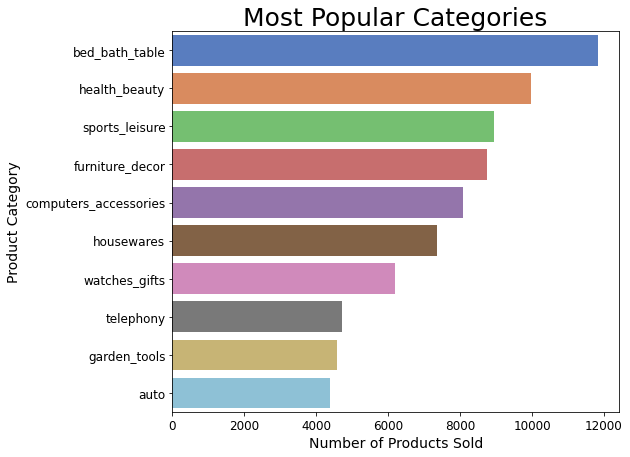

In [40]:
plt.figure (figsize = (8,7))

sns.barplot(y="product_category", x="counts", data=data_q1_top, palette = "muted")
sns.set_style("whitegrid")

plt.title ("Most Popular Categories", fontsize = 25)
plt.xlabel("Number of Products Sold", fontsize = 14)
plt.ylabel("Product Category", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Question 2: Least Popular Categories



### Create a summary table

In [41]:
data_q1_bottom = data_q1[["product_category", "counts"]].groupby("product_category").count().sort_values('counts', ascending = True)[:10]
data_q1_bottom = data_q1_bottom.reset_index()
data_q1_bottom

,product_category,counts
0,security_and_services,2
1,fashion_childrens_clothes,8
2,pc_gamer,10
3,cds_dvds_musicals,14
4,portable kitchen,15
5,la_cuisine,16
6,arts_and_craftmanship,24
7,fashion_sport,30
8,flowers,33
9,diapers_and_hygiene,39


### Create a visualization

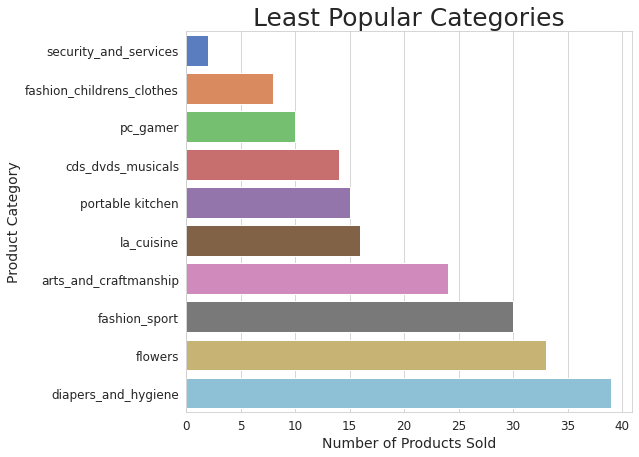

In [42]:
plt.figure (figsize = (8,7))

sns.barplot(y="product_category", x="counts", data=data_q1_bottom, palette = "muted")
sns.set_style("whitegrid")

plt.title ("Least Popular Categories", fontsize = 25)
plt.xlabel("Number of Products Sold", fontsize = 14)
plt.ylabel("Product Category", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Question 3: The 10 Products with the Highest Revenue

### Create a summary table

In [43]:
# Changing column names
data_q2 = data_final.rename({"product_category_name_english" : "product_category",
                            "price" : "revenue"}, axis=1)

# Create new table to calculate number of products sold based on product category
data_q2_top = data_q2[["product_category", "revenue"]].groupby("product_category").sum().sort_values("revenue", ascending = False)[:10]
data_q2_top = data_q2_top.reset_index()
data_q2_top


,product_category,revenue
0,health_beauty,1297355.80
1,watches_gifts,1253143.30
2,bed_bath_table,1092551.02
3,sports_leisure,1023996.34
4,computers_accessories,942277.57
5,furniture_decor,765093.89
6,housewares,666587.00
7,cool_stuff,662309.49
8,auto,616752.51
9,garden_tools,518217.54


### Create a visualization

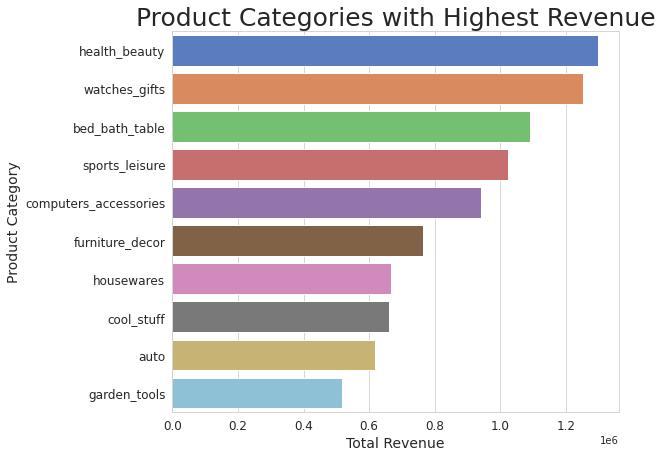

In [44]:
plt.figure (figsize = (8,7))

sns.barplot(y="product_category", x="revenue", data=data_q2_top, palette = "muted")
sns.set_style("whitegrid")

plt.title ("Product Categories with Highest Revenue", fontsize = 25)
plt.xlabel("Total Revenue", fontsize = 14)
plt.ylabel("Product Category", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Question 4: 10 Products with The Lowest Revenue

### Create a summary table

In [45]:
# Changing column names
data_q2 = data_final.rename({"product_category_name_english" : "product_category",
                            "price" : "revenue"}, axis=1)

# Create new table to calculate number of products sold based on product category
data_q2_bottom = data_q2[["product_category", "revenue"]].groupby("product_category").sum().sort_values("revenue", ascending = True)[:10]
data_q2_bottom = data_q2_bottom.reset_index()
data_q2_bottom


,product_category,revenue
0,security_and_services,283.29
1,fashion_childrens_clothes,569.85
2,cds_dvds_musicals,730.00
3,flowers,1110.04
4,diapers_and_hygiene,1567.59
5,pc_gamer,1675.94
6,arts_and_craftmanship,1814.01
7,fashion_sport,2119.51
8,la_cuisine,2303.98
9,fashion_female_clothing,2803.64


### Create a visualization

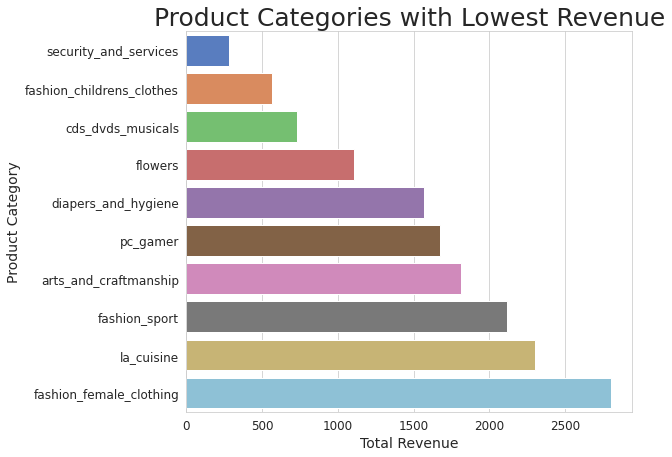

In [46]:
plt.figure (figsize = (8,7))

sns.barplot(y="product_category", x="revenue", data=data_q2_bottom, palette = "muted")
sns.set_style("whitegrid")

plt.title ("Product Categories with Lowest Revenue", fontsize = 25)
plt.xlabel("Total Revenue", fontsize = 14)
plt.ylabel("Product Category", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

## Question 5: Most Used Payment Type

### Create a summary table

In [47]:
data_q3 = data_final["payment_type"].value_counts()
data_q3.reset_index()


,index,payment_type
0,credit_card,86769
1,boleto,22867
2,voucher,6274
3,debit_card,1691


### Create a visualization

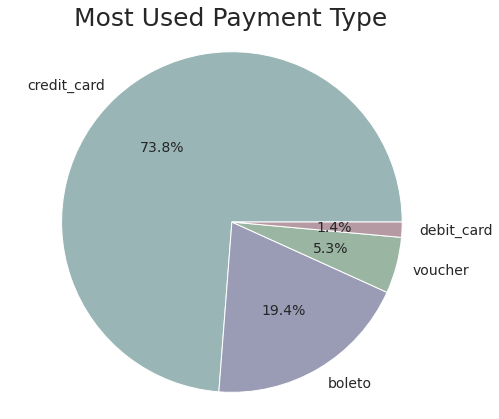

In [48]:
plt.figure (figsize = (8,7))

colors = ['#9ab5b5', '#9a9bb5', '#9ab5a2', '#b59aa4']
plt.pie(data_q3, labels = data_q3.index, autopct = '%.1f%%', textprops={'fontsize': 14}, colors = colors)
plt.axis('equal')

plt.title ("Most Used Payment Type", fontsize = 25)
plt.show()